In [38]:
#Import tutto quanto
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [46]:
# LOADING DATA

df=pd.read_csv("ICU_Challenge_Dataset.csv", sep=",")
df_description = df.describe()
columns = df.columns()
#df_description['percentage'] = df_description['count']/6000

TypeError: 'Index' object is not callable

In [41]:
# DUPLICATES

df.duplicated().any()

False

In [45]:
# MISSING DATA - da esplorare
# print(df[df.columns[df.isna().any()]])
percent_missing = df.isnull().sum() * 100 / len(df)
missing_value_df = pd.DataFrame({'column_name': df.columns,
                                 'percent_missing': percent_missing})
missing_value_df.sort_values('percent_missing', inplace=True)
print(missing_value_df)
print(df[df.columns[df.isna().any()]].isna().sum())

                         column_name  percent_missing
recordid                    recordid         0.000000
SAPS-I                        SAPS-I         0.000000
SOFA                            SOFA         0.000000
In-hospital_death  In-hospital_death         0.000000
Age                              Age         0.000000
...                              ...              ...
TroponinT_first      TroponinT_first        77.766667
Cholesterol_last    Cholesterol_last        92.133333
Cholesterol_first  Cholesterol_first        92.133333
TroponinI_last        TroponinI_last        95.250000
TroponinI_first      TroponinI_first        95.250000

[121 rows x 2 columns]
Gender                  6
Height               2886
Weight                528
DiasABP_first        1872
GCS_first             104
                     ... 
pH_last              1478
MechVentStartTime    2256
MechVentDuration     2256
MechVentLast8Hour    2256
UrineOutputSum       2256
Length: 113, dtype: int64


In [48]:
# Dropping data with missing percentage > 50
df_col_keep = missing_value_df[missing_value_df['percent_missing']<50]
df_col = df_col_keep['column_name']

df=df[df_col]


(array([5162.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
         838.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

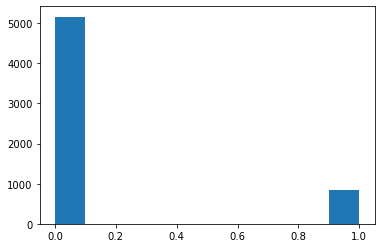

In [14]:
# TARGET VARIABLE

df['In-hospital_death'].unique()
fig, ax = plt.subplots()
ax.hist(df['In-hospital_death'])


In [29]:
# Variable type categorical / numerical
print(np.unique(df.dtypes))

int_var = list(df.columns[df.dtypes == np.int64])
float_var = list(df.columns[df.dtypes == np.float64])

cat_var = []
num_var = []
for cat in list(df.columns):
    if len(df[cat].unique()) <= 2:
        cat_var.append(cat)
    else:
        num_var.append(cat)

categorical_df = df[cat_var]
numerical_df = df[num_var]

[dtype('int64') dtype('float64')]


In [37]:
#Numerical data analysis
#numerical_df.hist(figsize=(10,10))

sns.pairplot(numerical_df)

# Correlation between variables


# Pair plot


# Check variable distributions / outlier


KeyboardInterrupt: 

Error in callback <function flush_figures at 0x7fcff0870160> (for post_execute):



KeyboardInterrupt



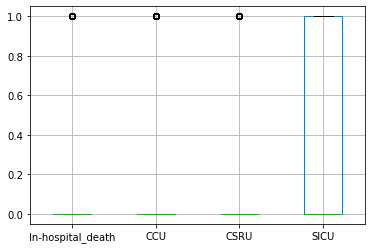

In [ ]:
# Merging categorical and numerical together
#print(dummies.shape)
#print(X_numerical.shape)
#dummies.tail()

#X=pd.concat([dummies,X_numerical], axis = 1)
#X.tail()

In [ ]:
# Separating train - test data
